In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re,string
from spire.doc import Document

In [136]:
df=pd.read_csv(r"C:\Users\dai\Desktop\NLP&CV\Datasets\UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [137]:
x =df["Resume"]
y=df["Category"]

<Axes: xlabel='count', ylabel='Category'>

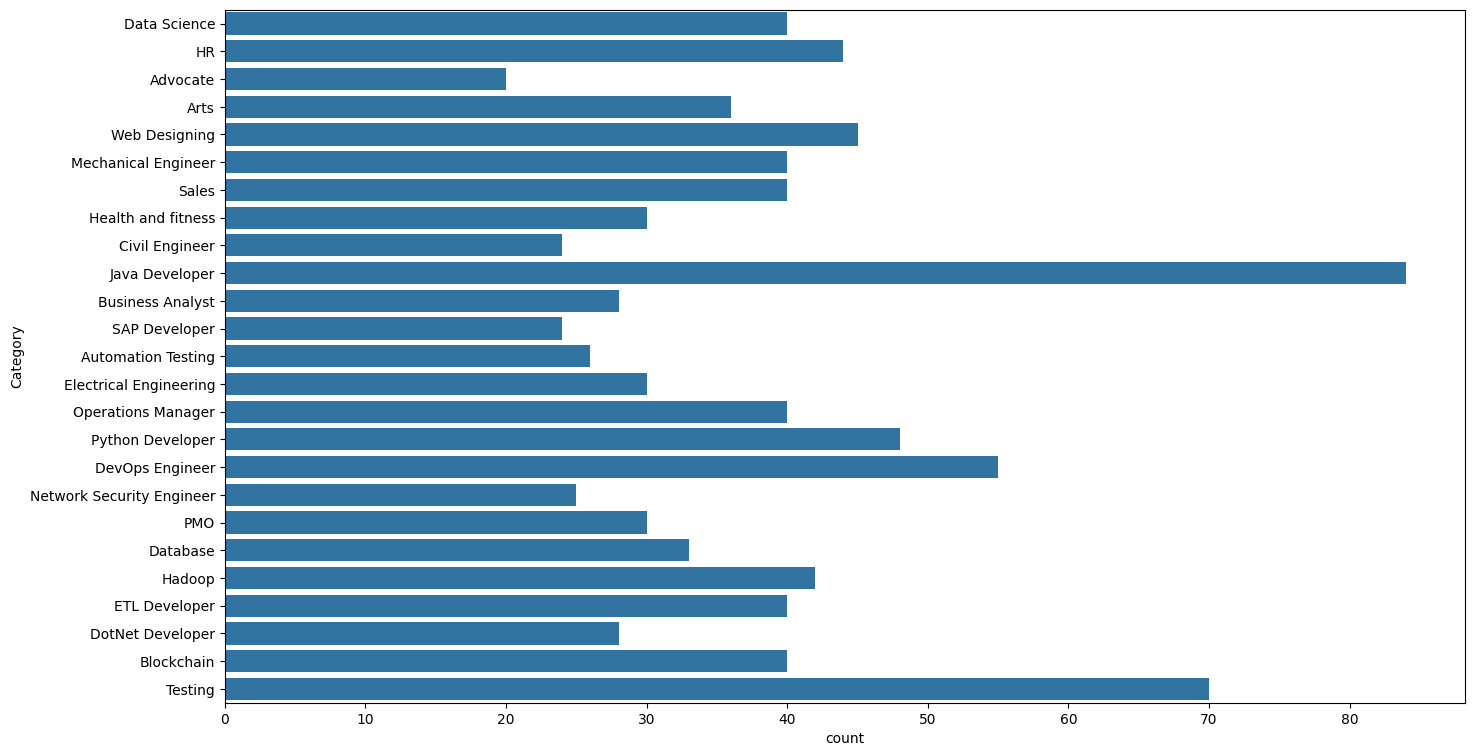

In [138]:
plt.figure(figsize=(16,9))
sns.countplot(y)

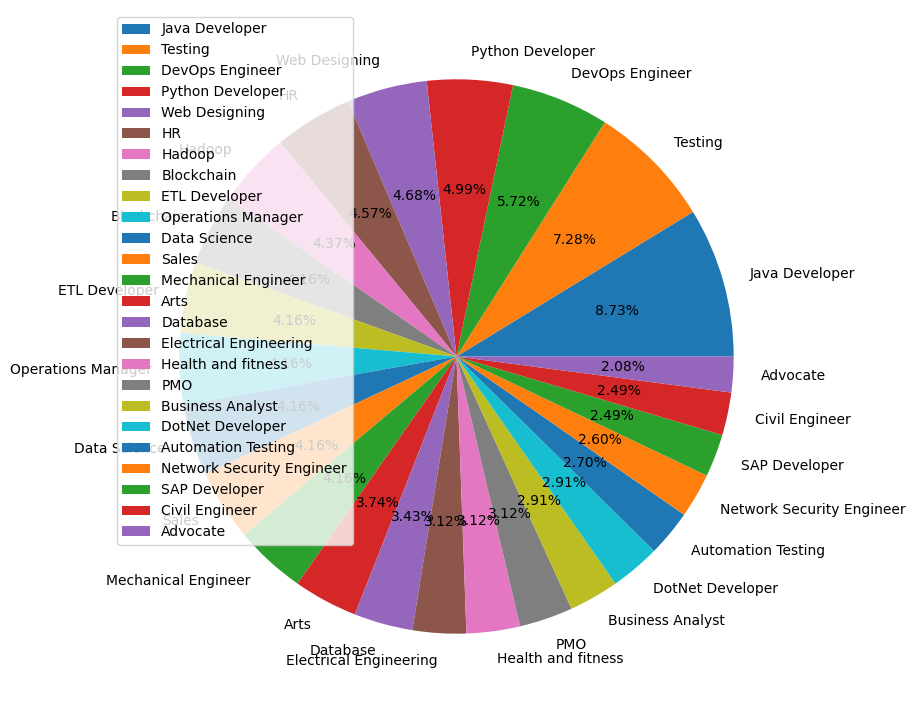

In [139]:
plt.figure(figsize=(16,9))
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct="%2.2f%%");
plt.legend()

In [140]:
def cleanResume(resumeText):
    resumeText = re.sub("https\S+\s+"," ",resumeText)
    resumeText = re.sub("RT|cc"," ",resumeText)
    resumeText = re.sub("#\S+"," ",resumeText)
    resumeText = re.sub("@\S+"," ",resumeText)
    resumeText = re.sub("[%s]" % re.escape(string.punctuation)," ",resumeText)
    resumeText = re.sub(r"[^\x00-\x7f]",r" ",resumeText)#Keep ASCII
    resumeText = re.sub("\s+"," ",resumeText) #extra whitespace
    return resumeText

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dai\AppData\Local\Temp\ipykernel_19736\362715874.py:2: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub("https\S+\s+"," ",resumeText)
C:\Users\dai\AppData\Local\Temp\ipykernel_19736\362715874.py:4: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub("#\S+"," ",resumeText)
C:\Users\dai\AppData\Local\Temp\ipykernel_19736\362715874.py:5: SyntaxWarning: invalid escape sequence '\S'
  resumeText = re.sub("@\S+"," ",resumeText)
C:\Users\dai\AppData\Local\Temp\ipykernel_19736\362715874.py:8: SyntaxWarning: invalid escape sequence '\s'
  resumeText = re.sub("\s+

In [141]:
sent="नमस्ते Hi! @Vaibhav how are you?\t\nHave you seen https://fb.com? #trend"

In [142]:
cleanResume(sent)

' Hi how are you Have you seen '

In [143]:
cleanResume(x[0])

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [144]:
cleaned=x.apply(cleanResume)

In [145]:
cleaned_data=cleaned.sum()

In [146]:
cleaned_data

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [147]:
len(cleaned_data)

2804947

In [148]:
from wordcloud import WordCloud

In [149]:
wcloud=WordCloud(background_color="white").generate(cleaned_data)

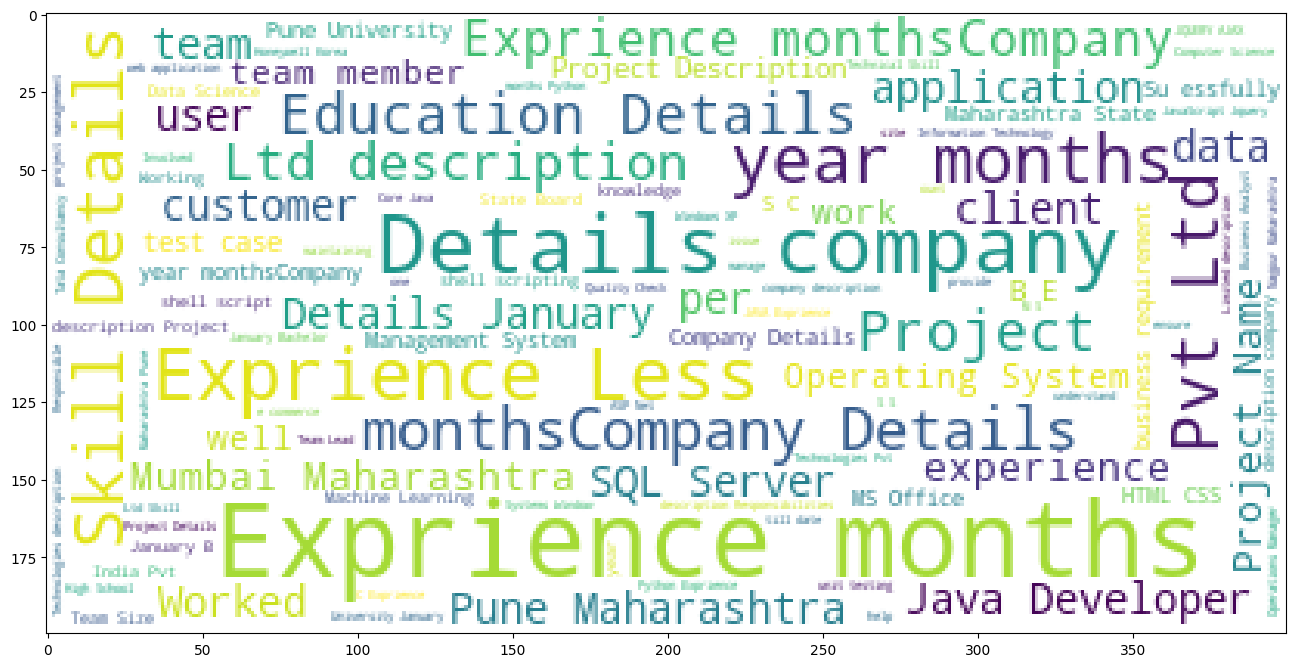

In [150]:
plt.figure(figsize=(16,9))
plt.imshow(wcloud)

In [151]:
cleaned.shape

(962,)

In [152]:
y.shape

(962,)

### **Tf*Idf Vectorization**

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
tfidf=TfidfVectorizer(stop_words="english")

In [155]:
x_new=tfidf.fit_transform(cleaned)

In [156]:
x_new.shape

(962, 7354)

In [157]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train,X_test,y_train,y_test=train_test_split(x_new,y,random_state=0,stratify=y)

In [160]:
X_train.shape,X_test.shape

((721, 7354), (241, 7354))

In [161]:
from sklearn.neighbors import NearestCentroid

In [162]:
nc=NearestCentroid()

In [163]:
nc.fit(X_train,y_train)

C:\Users\dai\AppData\Roaming\Python\Python312\site-packages\sklearn\neighbors\_nearest_centroid.py:244: UserWarning: self.within_class_std_dev_ has at least 1 zero standard deviation.Inputs within the same classes for at least 1 feature are identical.
  warnings.warn(


,metric,'euclidean'
,shrink_threshold,None
,priors,'uniform'


In [164]:
nc.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [165]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [166]:
y_pred=nc.predict(X_test)

<Figure size 1600x1600 with 0 Axes>

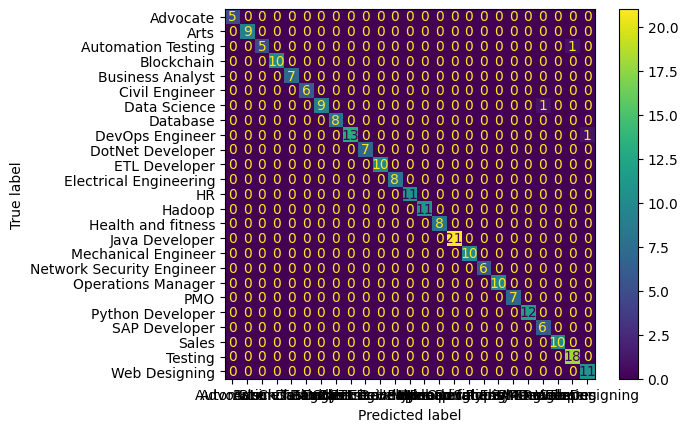

In [167]:
plt.figure(figsize=(16,16))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [168]:
accuracy_score(y_test,y_pred)

0.9875518672199171

In [169]:
print(classification_report(y_test,y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      0.83      0.91         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [170]:
file=open(r"C:\Users\dai\Desktop\NLP&CV\Datasets\Sample_resume.txt","r")
file1=file.read()
file1

'Tejashree Pishe \nJr. Machine Learning Engineer. (MITU Research) \nEXPERIENCE \nMITU Research, New Sangavi, Pune \n Feb 2021 till date \nHiko Technology Pvt. Ltd., Baner, Pune Full Time Internship \nAugust 2019 May 2020. \n \nKEY PROJECTS \nPredictive Analytics Implemented for Pistachio Types over quality parameter database\nStudy the origin, trade business and nutritional values over Pistachio types.\nReview the quality of pistachio types over its quality  \npararameters.\nCritically evaluate and data preprocessing over the database.\nUsed the Resampling techniques to work on imbalanced data set.\nIdentify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis.\nFind out the best suitable algorithm with more than 90% accuracy to predict the type of pistachio over new data.\nUpdating and upgrading the model with non-predictable data.\nTechnologies: Python for Data Science, NumPY, Panda,\nMachine Learning Algorithms \n \nDesign and de

In [171]:
file2=cleanResume(file1)

In [174]:
X_test = tfidf.transform([file2])

In [177]:
y_pred = nc.predict(X_test)
y_pred

array(['Data Science'], dtype=object)

## **SPP.docx**

In [189]:
document = Document()
file1 =document.LoadFromFile(r"C:\Users\dai\Desktop\NLP&CV\Datasets\SPP.docx","document")

NotFoundLookupError: For function "LoadFromFile" of spire.doc.interface.IDocument.IDocument, signature Signature(spire.doc.Document.Document, builtins.str, builtins.str) could not be resolved.